In [1]:
# -------------------- Imports -------------------- #
import keras, pandas as pd, sys, numpy as np, math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# -------------------- Globals -------------------- #
input_file = '../data/NSE:HINDPETRO.csv'
dataset = None
look_back = 30

verbosity = True

Most recent data point at : 2018-03-23 : 42.8444
Oldest data point at : 2000-01-03 : 339.0


/Users/avinashshenoy/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


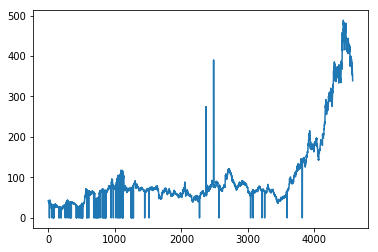

In [3]:
# -------------------- Data -------------------- #
def data_with_look_back(dataset):
    '''Returns x with look_back samples at time t and y with the sample at t+1 '''

    if len(dataset) < look_back:
        raise Exception("Dataset not large enough for given look back!")

    x, y = list(), list()
    for i in range(len(dataset) - look_back):
        x.append(dataset[i:look_back+i])
        y.append(dataset[look_back+i])
    
    return np.array(x), np.array(y)


# Get data
df = pd.read_csv(input_file, usecols=['timestamp', 'close'])
dataset = df['close'].astype('float32')
dataset = dataset[::-1]

if verbosity:
    print("Most recent data point at :", df['timestamp'][0], ":", dataset[len(dataset) - 1])
    print("Oldest data point at :", df['timestamp'][len(df['timestamp']) - 1], ":", dataset[0])

# Order data from oldest to newest
dataset = dataset.reshape((-1, 1))

plt.plot(dataset)
plt.show()

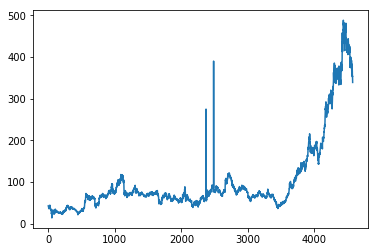

In [4]:
for i in range(len(dataset)):       # replace missing values with mean of prev and next
    if dataset[i] == 0:
        dataset[i] = np.mean([dataset[i-1], dataset[i+1]])

plt.plot(dataset)
plt.show()

In [5]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Train and test
l = len(dataset) * 60 // 100
train_data = dataset[:l]
test_data = dataset[l:]

if verbosity:
    print("Length of training set =", len(train_data))
    print("Length of test data =", len(test_data))


train_x, train_y = data_with_look_back(train_data)
test_x, test_y = data_with_look_back(test_data)

train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

Length of training set = 2745
Length of test data = 1831


In [6]:
# -------------------- Model -------------------- #
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_x, train_y, epochs=250, batch_size=30, verbose=2)

trainPredict = model.predict(train_x)
testPredict = model.predict(test_x)

Epoch 1/250
 - 1s - loss: 0.0054
Epoch 2/250
 - 0s - loss: 7.5992e-04
Epoch 3/250
 - 0s - loss: 5.9114e-04
Epoch 4/250
 - 0s - loss: 5.1135e-04
Epoch 5/250
 - 0s - loss: 4.8020e-04
Epoch 6/250
 - 0s - loss: 4.6236e-04
Epoch 7/250
 - 0s - loss: 4.4607e-04
Epoch 8/250
 - 0s - loss: 4.3283e-04
Epoch 9/250
 - 0s - loss: 4.1865e-04
Epoch 10/250
 - 0s - loss: 4.0799e-04
Epoch 11/250
 - 0s - loss: 3.9716e-04
Epoch 12/250
 - 0s - loss: 3.8778e-04
Epoch 13/250
 - 0s - loss: 3.8457e-04
Epoch 14/250
 - 0s - loss: 3.6949e-04
Epoch 15/250
 - 0s - loss: 3.6088e-04
Epoch 16/250
 - 0s - loss: 3.5763e-04
Epoch 17/250
 - 0s - loss: 3.5348e-04
Epoch 18/250
 - 0s - loss: 3.4544e-04
Epoch 19/250
 - 0s - loss: 3.4039e-04
Epoch 20/250
 - 0s - loss: 3.3711e-04
Epoch 21/250
 - 0s - loss: 3.3208e-04
Epoch 22/250
 - 0s - loss: 3.3338e-04
Epoch 23/250
 - 0s - loss: 3.2869e-04
Epoch 24/250
 - 0s - loss: 3.2538e-04
Epoch 25/250
 - 0s - loss: 3.2325e-04
Epoch 26/250
 - 0s - loss: 3.1977e-04
Epoch 27/250
 - 0s - loss

Epoch 214/250
 - 0s - loss: 2.6443e-04
Epoch 215/250
 - 0s - loss: 2.5915e-04
Epoch 216/250
 - 0s - loss: 2.5961e-04
Epoch 217/250
 - 0s - loss: 2.6014e-04
Epoch 218/250
 - 0s - loss: 2.5756e-04
Epoch 219/250
 - 0s - loss: 2.6021e-04
Epoch 220/250
 - 0s - loss: 2.5687e-04
Epoch 221/250
 - 0s - loss: 2.5986e-04
Epoch 222/250
 - 0s - loss: 2.5740e-04
Epoch 223/250
 - 0s - loss: 2.6331e-04
Epoch 224/250
 - 0s - loss: 2.5680e-04
Epoch 225/250
 - 0s - loss: 2.5611e-04
Epoch 226/250
 - 0s - loss: 2.6271e-04
Epoch 227/250
 - 0s - loss: 2.5941e-04
Epoch 228/250
 - 0s - loss: 2.5742e-04
Epoch 229/250
 - 0s - loss: 2.5631e-04
Epoch 230/250
 - 0s - loss: 2.5545e-04
Epoch 231/250
 - 0s - loss: 2.5855e-04
Epoch 232/250
 - 0s - loss: 2.5806e-04
Epoch 233/250
 - 0s - loss: 2.5584e-04
Epoch 234/250
 - 0s - loss: 2.5624e-04
Epoch 235/250
 - 0s - loss: 2.5296e-04
Epoch 236/250
 - 0s - loss: 2.6027e-04
Epoch 237/250
 - 0s - loss: 2.5665e-04
Epoch 238/250
 - 0s - loss: 2.5428e-04
Epoch 239/250
 - 0s - los

In [7]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
train_y = scaler.inverse_transform(train_y)
testPredict = scaler.inverse_transform(testPredict)
test_y = scaler.inverse_transform(test_y)

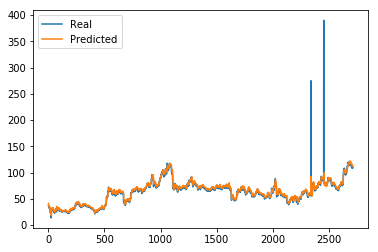

In [8]:
# Predicted Vs Original of train set

plt.plot(train_y, label='Real')
plt.plot(trainPredict, label='Predicted')
plt.legend()
plt.show()

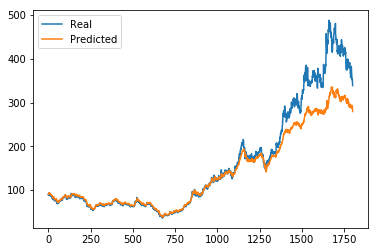

In [9]:
# Predicted Vs Original of train set

plt.plot(test_y, label='Real')
plt.plot(testPredict, label='Predicted')
plt.legend()
plt.show()

In [10]:
# calculate RMSE
trainScore = math.sqrt(np.mean([math.fabs(x - y)**2 for x, y in zip(train_y, trainPredict)]))
print('Average RMSE in Training set predictions: %.2f ' % (trainScore))
testScore = math.sqrt(np.mean([math.fabs(x - y)**2 for x, y in zip(test_y, testPredict)]))
print('Average RMSE in Test set predictions: %.2f ' % (testScore))

Average RMSE in Training set predictions: 7.60 
Average RMSE in Test set predictions: 42.96 


In [11]:
# calculate average error
trainScore = np.mean([math.fabs(x - y) for x, y in zip(train_y, trainPredict)])
print('Average Error in Training set predictions: %.2f ' % (trainScore))
testScore = np.mean([math.fabs(x - y) for x, y in zip(test_y, testPredict)])
print('Average Error in Test set predictions: %.2f ' % (testScore))

Average Error in Training set predictions: 2.32 
Average Error in Test set predictions: 21.84 


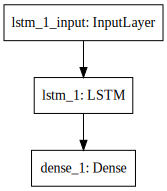

In [13]:
# -------------------- The Model -------------------- #

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))